<a href="https://colab.research.google.com/github/azheng456/2020-Xtern-Data-Science/blob/main/XternDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import pandas, matplotlib, and numpy for csv reading, data analysis, and visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import *

In [2]:
#use pandas read csv function to read in the provided data
data = pd.read_csv('2020-XTern-DS.csv')

#clean up data for readability in Python
#Empty values in Reviews and Votes column are set to 0
#However, this can't be applied to rating as a rating of 0 means something (bad)
#Reviews and Votes are also changed to an integer format 
data['Reviews'].replace({'-':0},inplace=True)
data['Reviews'] = data['Reviews'].astype(int)
data['Votes'].replace({'-':0},inplace=True)
data['Votes'] = data['Votes'].astype(int)
#removed the $ sign, changed values such as x,yz to x.yz
#and changed type to float
data['Average_Cost'] = data['Average_Cost'].str.replace('$','')
data['Average_Cost'] = data['Average_Cost'].str.replace(',','.')
data['Average_Cost'] = data['Average_Cost'].astype(float)
#do the same with minimum order
data['Minimum_Order'] = data['Minimum_Order'].str.replace('$','')
data['Minimum_Order'] = data['Minimum_Order'].astype(float)
#for cook time, all values are in units of minutes so we can remove that
#and change format to int
data['Cook_Time'] = data['Cook_Time'].str.replace('minutes','')
data['Cook_Time'] = data['Cook_Time'].astype(int)

In [ ]:
#let's also make a dataset for only restaurants with ratings so we can analyze later
#look at unique values of rating column, want to get rid of all
#non number values
data['Rating'].unique()

array(['3.5', '3.6', '3.7', '3.2', '3.8', '4.0', '3.9', '4.2', '-', '2.8',
       '3.0', '3.3', '3.1', '4.7', '3.4', '4.1', 'NEW', '2.9', '4.6',
       '4.3', '2.6', '4.5', '4.4', '4.8', '2.4', '2.7', '2.5',
       'Opening Soon'], dtype=object)

In [ ]:
#-, NEW, Opening Soon are the values we need to exclude
ratings = data.loc[(data['Rating']!='-')&(data['Rating']!='NEW')&(data['Rating']!='Opening Soon')]
#change format to float
ratings['Rating'] = ratings['Rating'].astype(float)

**Finding #1**

In [ ]:
#slice the dataset to only include controversial restaurants where there
#are over 500 reviews in a new dataset called 'controv'
controv = data.loc[data['Reviews']>500]

#We take a look at the ratio of wait times that are over 45 mins in both
#regular restaurants and our version of 'controversial' restaurants
a=b=c=d=0
for x in data['Cook_Time']:
  if x>=45:
    a+=1
  b+=1
for x in controv['Cook_Time']:
  if x>=45:
    c+=1
  d+=1

print("The percentage that restaurants have a cook time that takes at least 45 minutes in...")
#output as a percentage as that is easiest for us to understand the value
#and process what it means
print("All Restaurants: " + str(round(a/b*100,2)) + "%")
print("Controversial Restaurants: " + str(round(c/d*100,2)) + "%")

The percentage that restaurants have a cook time that takes at least 45 minutes in...
All Restaurants: 33.09%
Controversial Restaurants: 76.19%


This finding shows that controversial restaurants (not necessarily bad, but have a high number of reviews) have a significantly higher average wait time. This could also be good or bad, but it shows the popularity of these restaurants. Customers who want to try popular restaurants with a lot of reviews may have to wait much longer than other restaurants. Let's also make a pie chart to see a larger breakdown of cook times.


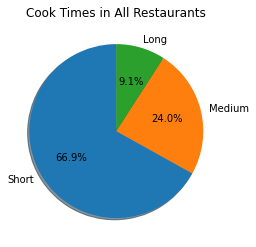

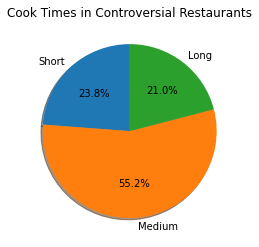

In [ ]:
a=b=c=d=e=f=0
labels = 'Short', 'Medium', 'Long'
#all restaurants
for x in data['Cook_Time']:
  if x<=30:
    a+=1
  elif x<=45:
    b+=1
  else:
    c+=1
sizes = [a,b,c]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Cook Times in All Restaurants")
plt.show()

#controversial restaurants
for x in controv['Cook_Time']:
  if x<=30:
    d+=1
  elif x<=45:
    e+=1
  else:
    f+=1
sizes = [d,e,f]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Cook Times in Controversial Restaurants")
plt.show()

As shown by the contrasting distribution in the pie charts, out of all restaurants, most had a "short" cook time, characterized by 30 or less minutes. Meanwhile, controversial restaurants had a much different distribution, with the majority of cook times being between 30 and 45 minutes, inclusive, and long cook times of over 45 minutes being almost as common as short cook times. This highlights the difference of controversial restaurants with a lot of reviews.

**Finding #2**

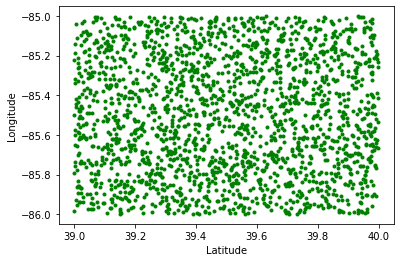

In [ ]:
#Let's take a look at how the restaurants are spread out
#based on latitude and longitude
plt.plot(data['Latitude'], data['Longitude'], 'go',markersize=3)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

Well, it's hard to tell anything with this many datapoints. Let's break the restaurants up into 4 regions and look at the averages of restaurants in each region. We'll look at an objective measure, Rating, so we will use the ratings dataframe we made earlier with only restaurants that have a numeric rating.


In [ ]:
#get the 50% value of latitude and longitude
ratings['Latitude'].describe()

count    1666.000000
mean       39.503615
std         0.287469
min        39.000105
25%        39.260630
50%        39.506984
75%        39.753907
max        39.999523
Name: Latitude, dtype: float64

In [ ]:
ratings['Longitude'].describe()

count    1666.000000
mean      -85.503619
std         0.290402
min       -85.998844
25%       -85.746871
50%       -85.507890
75%       -85.249105
max       -85.001541
Name: Longitude, dtype: float64

In [ ]:
#divide up the 4 regions based off the middle (50%)
#of the latitude and longitude values
northeast = ratings.loc[(ratings['Latitude']>=39.506984) & (ratings['Longitude']>=-85.507890)]
northwest = ratings.loc[(ratings['Latitude']<39.506984) & (ratings['Longitude']>=-85.507890)]
southeast = ratings.loc[(ratings['Latitude']>=39.506984) & (ratings['Longitude']<-85.507890)]
southwest = ratings.loc[(ratings['Latitude']<39.506984) & (ratings['Longitude']<-85.507890)]
#perfect, all of them have a very similar amount of restaurants

In [ ]:
print("Northeast restaurants have a mean rating of "+str(round(northeast['Rating'].mean(),3))+
      " and standard deviation of " + str(round(northeast['Rating'].std(),4)))
print("Northwest restaurants have a mean rating of "+str(round(northwest['Rating'].mean(),3))+
      " and standard deviation of " + str(round(northwest['Rating'].std(),4)))
print("Southeast restaurants have a mean rating of "+str(round(southeast['Rating'].mean(),3))+
      " and standard deviation of " + str(round(southeast['Rating'].std(),4)))
print("Southwest restaurants have a mean rating of "+str(round(southwest['Rating'].mean(),3))+
      " and standard deviation of " + str(round(southwest['Rating'].std(),4)))

Northeast restaurants have a mean rating of 3.593 and standard deviation of 0.4233
Northwest restaurants have a mean rating of 3.632 and standard deviation of 0.418
Southeast restaurants have a mean rating of 3.581 and standard deviation of 0.4222
Southwest restaurants have a mean rating of 3.631 and standard deviation of 0.4252


Let's graph our results out to visualize it better. A boxplot chart is best suited to look at median and standard deviations.


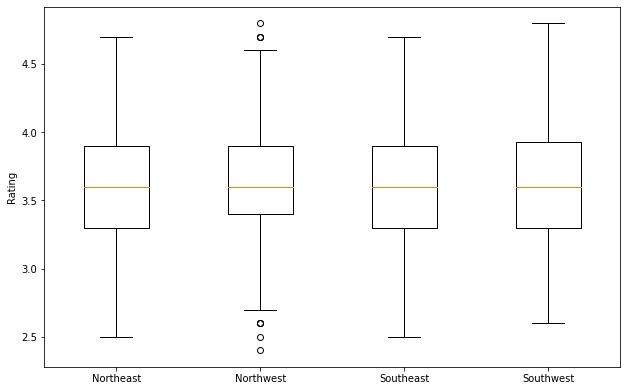

In [ ]:
data = [northeast['Rating'], northwest['Rating'], southeast['Rating'], southwest['Rating']] 
  
fig = plt.figure(figsize =(8, 5)) 
  
ax = fig.add_axes([0, 0, 1, 1]) 

ax.set_xticklabels(['Northeast', 'Northwest',  
                    'Southeast', 'Southwest']) 
ax.set_ylabel('Rating')
 
bp = ax.boxplot(data) 
  
plt.show() 

Although the averages are quite similar (expected with a large sample size), based on our previous calculations, we find that in order of mean ratings by region, the order goes Northwest, Southwest, Northeast, then Southeast. In terms of variability of ratings, the order goes (from most variability to the least) Southwest, Northeast, Southeast, and Northwest. From the boxplots, it's extremely interesting that although Northwest had the smallest standard deviation, it was the only region with rating outliers.

**Finding #3**

Let's use the regions again, but this time we can look at more subjective aspects of the restaurants. We'll use Average Cost, Minimum Order, Votes, and Cook Time. These values don't put restaurants above each other, however, as although most people may want a faster cooking time, some might be looking for a good dining experience and are willing to wait longer to have a more enjoyable time.

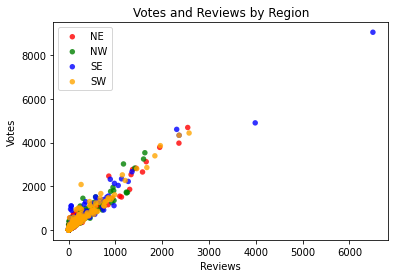

In [ ]:
d1 = (northeast['Reviews'],northeast['Votes'])
d2 = (northwest['Reviews'],northwest['Votes'])
d3 = (southeast['Reviews'],southeast['Votes'])
d4 = (southwest['Reviews'],southwest['Votes'])

data = (d1, d2, d3, d4)
colors = ("red", "green", "blue", "orange")
groups = ("NE", "NW", "SE", "SW")

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, facecolor="1.0")

for data, color, group in zip(data, colors, groups):
  x, y = data
  ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
plt.xlabel('Reviews')
plt.ylabel('Votes')
plt.title('Votes and Reviews by Region')
plt.legend(loc=2)
plt.show()

There are 2 clear outliers, and both interestingly belong in the Southeast region. These 2 restaurants must be worth checking out with a very high number of reviews each. For visualization purposes, we will remove the 2 outliers to get a better look at all the other restaurants.

In [ ]:
se_new = southeast.loc[southeast['Reviews']!=southeast['Reviews'].max()]
se_new = se_new.loc[se_new['Reviews']!=se_new['Reviews'].max()]

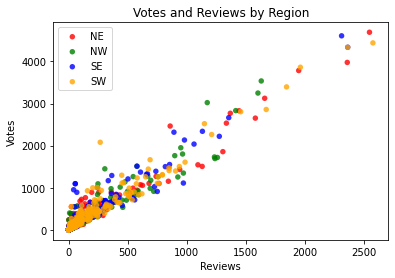

In [ ]:
d1 = (northeast['Reviews'],northeast['Votes'])
d2 = (northwest['Reviews'],northwest['Votes'])
d3 = (se_new['Reviews'],se_new['Votes'])
d4 = (southwest['Reviews'],southwest['Votes'])

data = (d1, d2, d3, d4)
colors = ("red", "green", "blue", "orange")
groups = ("NE", "NW", "SE", "SW")

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, facecolor="1.0")

for data, color, group in zip(data, colors, groups):
  x, y = data
  ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
plt.xlabel('Reviews')
plt.ylabel('Votes')
plt.title('Votes and Reviews by Region')
plt.legend(loc=2)
plt.show()

In [ ]:
print(northeast['Reviews'].mean())
print(northwest['Reviews'].mean())
print(southeast['Reviews'].mean())
print(southwest['Reviews'].mean())

113.19575471698113
111.72616136919315
133.73349633251834
131.88443396226415


The scatterplot along with the means of each of the 4 regions show the popularity of the restaurants in the regions. The order of popularity goes Southeast, Southwest, followed by a sizeable gap with Northeast and Northwest trailing. It is evident with these results that the restaurants in the South have much more reviews and votes than restaurants in the North.

**Finding #4**

Let's say a user wants to rank certain criteria and wants a list of the top restaurants that fit his criteria. Because GitHub does not support interactivity (dropdown menu, sliding bar, etc), I will choose example values. The ranking system will be from 1-10 (1 being doesn't matter and 10 being very important) for each of the criteria and output a score for each restaurant; the highest 20 scores will be outputted to the user.

In [ ]:
#We set the 1-10 values of each of the 5 variables
cost=8
review=3
location=9 #south
rating=6
cook=4
#initialize new column Score
ratings["Score"]=""
for x in ratings.axes[0]:
  score=0
  #our algorithm takes the (value-minimum) / range, and multiplies it by the
  #1-10 value we set, sometimes the inverse (in cost and cook time case)
  score += ((ratings['Average_Cost'][x]-1)/149*(10-cost) + [ratings['Reviews'][x]/6504*review + 
          (ratings['Longitude'][x]+86)/1*location + (ratings['Rating'][x]-2.4)/2.4*rating +
          (ratings['Cook_Time'][x]-20)/100*(10-cook)])
  ratings["Score"][x]=score
#sort the new df by score
results = ratings.sort_values(by='Score',ascending=False)
#get the top 20 results
results.head(20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time,Score
602,ID_8529,39.356060,-85.011488,"Cafe, Fast Food",30.0,50.0,4.5,1349,972,65,[17.684207968361303]
683,ID_5879,39.416346,-85.061462,"North Indian, Mughlai, Kebab",90.0,450.0,4.2,1262,758,65,[17.19110521879318]
973,ID_2421,39.351230,-85.012645,"Continental, North Indian, Mughlai, Italian, A...",80.0,50.0,4.5,2831,1415,30,[16.44926855131655]
80,ID_7753,39.571114,-85.069320,"European, Continental, North Indian, Desserts",75.0,50.0,4.3,3124,1660,45,[16.385091337430623]
785,ID_596,39.046004,-85.285628,"Bakery, Desserts, Fast Food",25.0,99.0,3.8,27,23,120,[16.26210396709533]
1342,ID_7879,39.624209,-85.028977,"Kashmiri, North Indian, Mughlai, Seafood",45.0,0.0,4.0,829,432,65,[16.229077249465618]
717,ID_1415,39.527835,-85.015468,"Burger, Fast Food",20.0,99.0,4.0,1155,845,65,[16.205579454648475]
1743,ID_981,39.851230,-85.041865,"Cafe, Salad, Italian, American, Bakery, Beverages",40.0,50.0,4.5,879,518,45,[16.135630592184757]
928,ID_4204,39.382805,-85.271197,"Bakery, Fast Food, Desserts",20.0,50.0,3.7,147,72,120,[16.097475029150253]
35,ID_1160,39.246289,-85.152915,"Asian, Burmese, Bubble Tea, Desserts, Salad, T...",60.0,50.0,4.7,914,499,45,[15.895873220385326]


Looking at the top 20 results, it seems like the scoring system worked pretty well. All of the top restaurants had a longitude of very close to -85, which makes sense as location was the highest priority at a 9. The second highest scorer, however, had a high average cost, which was quite surprising because cost was an 8 in priority so its other factors may have made up for it.